In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amazon_data=pd.read_csv('Amazon Sales data.csv')

In [3]:
amazon_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [5]:
amazon_data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [6]:
# changing data to datetime format
amazon_data['Order Date']=pd.to_datetime(amazon_data['Order Date'])
amazon_data['Ship Date']=pd.to_datetime(amazon_data['Ship Date'])

In [7]:
amazon_data['Month'] = amazon_data['Order Date'].dt.month
amazon_data['Year']=amazon_data['Order Date'].dt.year
amazon_data['Year_Month']=amazon_data['Order Date'].dt.to_period('M')

In [8]:
# Changing Month number to name
import calendar

# Create a new column 'Month_Name' containing the month names
amazon_data['Month_name'] = amazon_data['Month'].apply(lambda x: calendar.month_name[x])

In [9]:
amazon_data.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month,Year,Year_Month,Month_name
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,2010-05,May
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,2012-08,August
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,2014-05,May


In [10]:
amazon_data['Year'].value_counts()

Year
2012    22
2014    15
2013    12
2011    12
2015    11
2010    10
2016    10
2017     8
Name: count, dtype: int64

In [11]:
amazon_data['Year_Month']

0     2010-05
1     2012-08
2     2014-05
3     2014-06
4     2013-02
       ...   
95    2011-07
96    2011-11
97    2016-06
98    2015-07
99    2012-02
Name: Year_Month, Length: 100, dtype: period[M]

# Sales Trends

### Monthy Sales

In [12]:
monthly_sales = amazon_data.groupby('Month')['Total Profit'].sum()
monthly_sales

Month
1     2816857.02
2     7072050.51
3      928351.06
4     4760208.35
5     4582692.30
6     2185379.43
7     5578463.06
8      579276.67
9     2344166.03
10    4506923.25
11    6457600.65
12    2356230.07
Name: Total Profit, dtype: float64

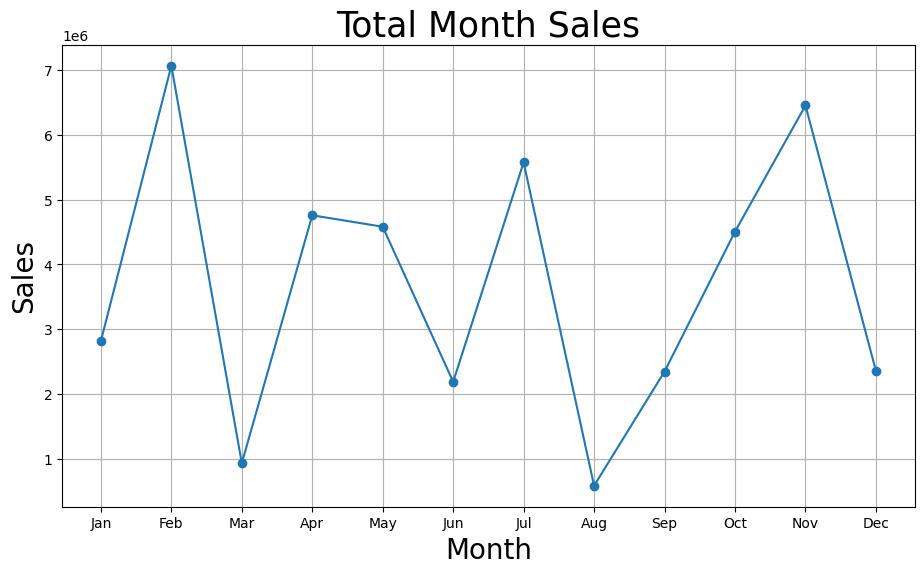

In [13]:
# Monthly Sales Trend
plt.figure(figsize=(11, 6))
monthly_bins=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(range(len(monthly_bins)),monthly_sales, marker='o', linestyle='-')
plt.xticks(ticks=range(len(monthly_bins)), labels=monthly_bins)


plt.title('Total Month Sales',fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Sales',fontsize=20)

plt.grid(True)
plt.show()

### Yearly Sales Trend

In [14]:
yearly_sales = amazon_data.groupby('Year')['Total Profit'].sum().sort_index()
yearly_sales

Year
2010    6629567.43
2011    2741008.23
2012    9213010.12
2013    6715420.04
2014    5879461.68
2015    3996539.44
2016    4903838.01
2017    4089353.45
Name: Total Profit, dtype: float64

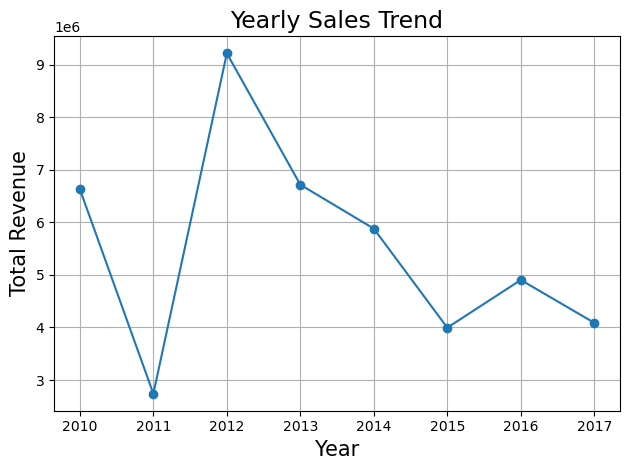

In [15]:
# Yearly Sales Trend

plt.plot(yearly_sales,marker='o', linestyle='-')

plt.title('Yearly Sales Trend',fontsize=17)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Total Revenue',fontsize=15) 
plt.grid(True)
plt.tight_layout()
plt.show()


### Year Monthy Sales Trend

In [16]:
year_monthly_sales = amazon_data.groupby('Year_Month')['Total Profit'].sum().sort_index()
year_monthly_sales

Year_Month
2010-02    1424410.94
2010-05     965441.52
2010-06     727423.20
2010-10    1495392.79
2010-11    1375311.70
2010-12     641587.28
2011-01     363509.04
2011-02     127722.96
2011-04     693911.51
2011-05      89904.06
2011-06       7828.12
2011-07      65214.72
2011-09     235601.16
2011-11    1157316.66
2012-01     206568.36
2012-02    1553766.98
2012-03     407630.41
2012-04     971008.14
2012-05    1218518.14
2012-06     698414.36
2012-07    1065073.62
2012-08     248406.36
2012-09    2084889.03
2012-10     758734.72
2013-02     639077.50
2013-03     359941.17
2013-04     632512.50
2013-06     515753.38
2013-07    3398463.02
2013-08      23150.46
2013-09      18405.17
2013-10    1074864.34
2013-12      53252.50
2014-02     655704.80
2014-04    1838545.92
2014-05     938755.75
2014-06      19525.82
2014-07     227273.58
2014-08     306097.92
2014-09       5270.67
2014-10     735800.80
2014-11    1152486.42
2015-01    1367272.50
2015-02     780095.53
2015-04     624230.28

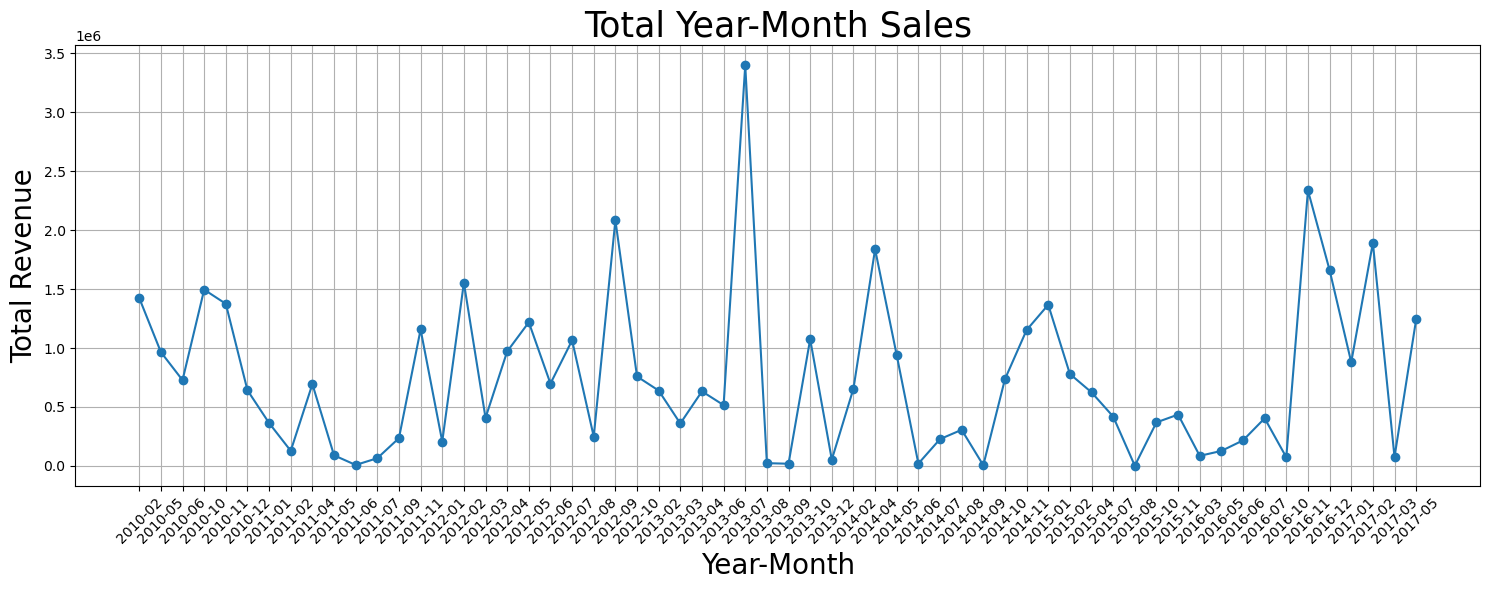

In [17]:
# Year-Month Sales Trend

plt.figure(figsize=(15, 6))
plt.plot(year_monthly_sales.index.astype(str), year_monthly_sales.values, marker='o', linestyle='-')

plt.title('Total Year-Month Sales',fontsize=25)
plt.xlabel('Year-Month', fontsize=20)
plt.ylabel('Total Revenue',fontsize=20)

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Sales by Item Type

In [19]:
# Total Sales by Item Type
total_revenue_by_item_type = amazon_data.groupby('Item Type')['Total Revenue'].sum()
total_revenue_by_item_type

Item Type
Baby Food          10350327.60
Beverages           2690794.60
Cereal              5322898.90
Clothes             7787292.80
Cosmetics          36601509.60
Fruits               466481.34
Household          29889712.29
Meat                4503675.75
Office Supplies    30585380.07
Personal Care       3980904.84
Snacks              2080733.46
Vegetables          3089057.06
Name: Total Revenue, dtype: float64

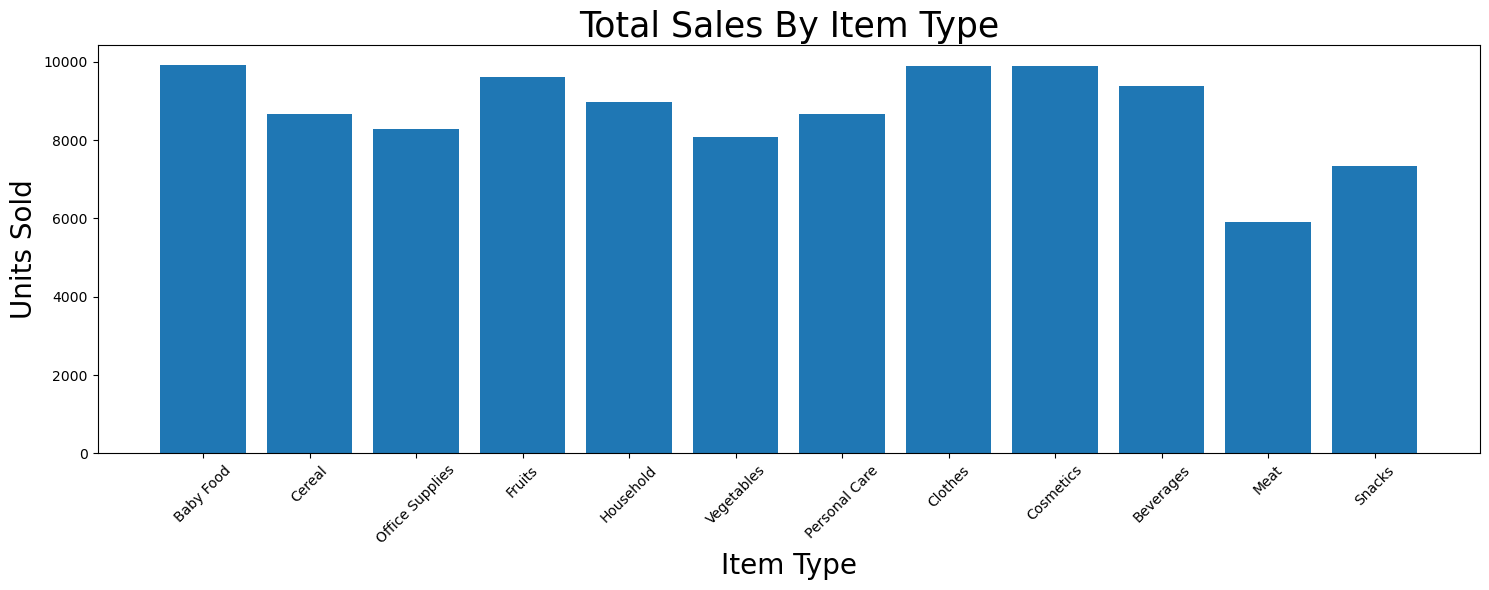

In [20]:
# Plot of Total Sales by Item Type
plt.figure(figsize=(15, 6))
item=amazon_data['Item Type']
revenue=amazon_data['Units Sold']

plt.bar(item,revenue)

plt.title('Total Sales By Item Type',fontsize=25)
plt.xlabel('Item Type', fontsize=20)
plt.ylabel('Units Sold',fontsize=20)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



# Total Sales by Sales Channel

In [21]:
# Total Sales by Sales Channel
total_sales_by_channel = amazon_data.groupby('Sales Channel')['Units Sold'].sum()
total_sales_by_channel

Sales Channel
Offline    276782
Online     236089
Name: Units Sold, dtype: int64

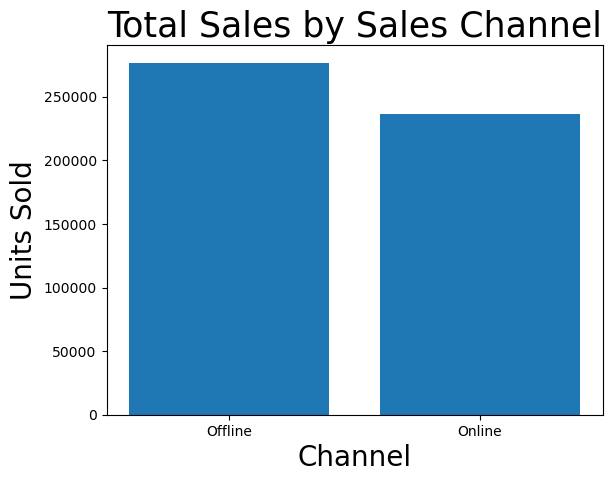

In [22]:
# Chart of Total Sales by Sales Channel

plt.bar(total_sales_by_channel.index,total_sales_by_channel.values)

plt.title('Total Sales by Sales Channel',fontsize=25)
plt.xlabel('Channel', fontsize=20)
plt.ylabel('Units Sold',fontsize=20)
plt.show()

### Correlation Matrix

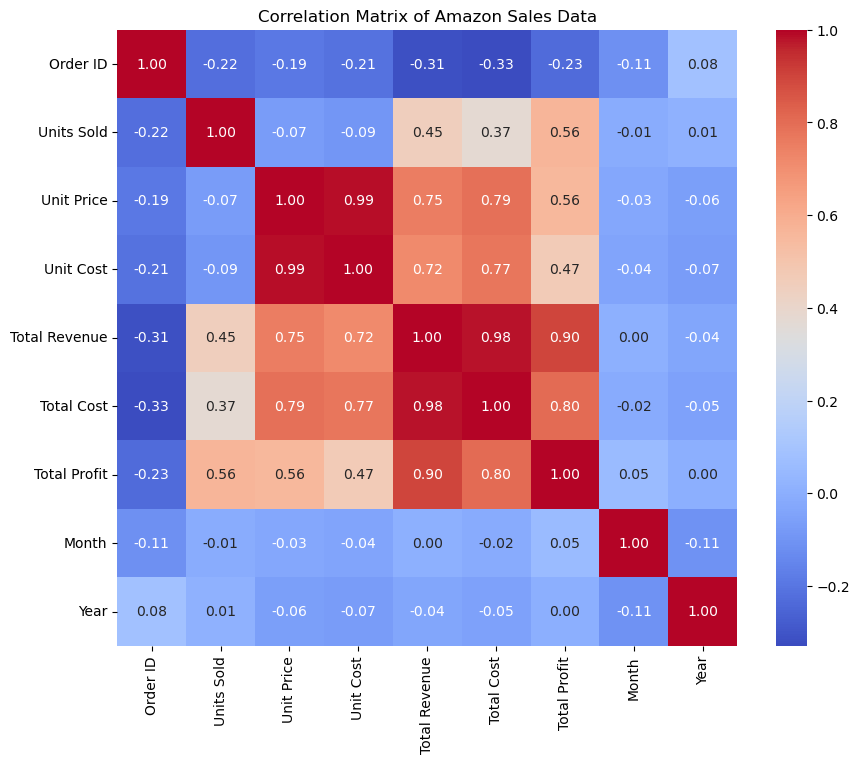

In [23]:
# Calculate correlation matrix
num_columns = amazon_data.select_dtypes(include=['number'])
correlation_matrix = num_columns.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Amazon Sales Data')
plt.show()

In [24]:
amazon_data.to_excel('amazon_data.xlsx', index=False)